author: Zhidan Luo

CPE 7993 - Independent study

Project: Recognition of human activities

In [49]:
__author__ = 'Zhidan Luo'

# General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# SVM
from sklearn.svm import SVC

# PCA
from sklearn.decomposition import PCA

# kFOLD and gridSearch
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Google Colab stuff
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def load_data(csv_file_path, train_mode = False):
    dataframe = pd.read_csv(csv_file_path)
    if train_mode:
      dataframe = shuffle(dataframe)
    dataframe = dataframe.replace(' ?',np.NaN).fillna(method = 'bfill')    
    data = dataframe.values
    x = data[:, 1:].astype('float32')
    y = data[:, 0].astype(int) - 1
    
    return x, y


def pca(x_train, y_train, x_test, y_test, n_components):
    pca = PCA(n_components = n_components)
    pca.fit(x_train)
    x_train = pca.transform(x_train)
    x_test = pca.transform(x_test)
    return x_train, y_train, x_test, y_test


def predict(x_test, y_test, trained_model):
    predictions = trained_model.predict(x_test)

    loss = metrics.zero_one_loss(predictions, y_test)
    acc = metrics.accuracy_score(predictions, y_test)

    print("testing loss: %.4f" % loss)
    print("testing accuracy: %.4f" % acc)

    return predictions, loss, acc

In [0]:
def train_svm(x_train, y_train, n_components):
        
    svm_classifier = SVC()
    
    parameter_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                  'C': [10**i for i in range(-1,2)],
                  'degree': [2*i+1 for i in range(5)],
                  'gamma': ['auto']}
    
    skf = StratifiedKFold(n_splits = nfolds)
    cross_validation = skf.get_n_splits(x_train, y_train)
    
    grid_search = GridSearchCV(svm_classifier, 
                               param_grid = parameter_grid,
                               cv = cross_validation,
                               n_jobs = -1,
                               verbose = 0)
    grid_search.fit(x_train, y_train)
    
    print("Pricipal components number: ", n_components)
    print("Best param:", grid_search.best_params_)
    
    best_model = SVC(**grid_search.best_params_)
    best_model.fit(x_train, y_train)
    predictions = best_model.predict(x_train)
    training_loss = metrics.zero_one_loss(predictions, y_train)
    training_acc = metrics.accuracy_score(predictions, y_train)
    print("training loss: %.6f" % training_loss)
    print("training accurancy: %.6f" % training_acc)

    return best_model, grid_search.best_params_, training_loss, training_acc

In [0]:
def get_predictions(training_csv, testing_csv, n_components_list, show = True):

  train_accuracy = []
  train_loss = []
  test_accuracy = []
  test_loss = []
  best_n = 0
  best_acc = 0
  best_params = 0
  best_predictions = 0

  for n_components in n_components_list:
    x_train, y_train = load_data(training_csv, train_mode = True)
    x_test, y_test = load_data(testing_csv)

    x_train, y_train, x_test, y_test = pca(x_train, y_train, 
                                           x_test, y_test,
                                           n_components = n_components)
    trained_model, params, training_loss, training_acc = train_svm(x_train, y_train, n_components)
    predictions, loss, acc = predict(x_test, y_test, trained_model)

    train_accuracy.append(training_acc)
    train_loss.append(training_loss)
    test_accuracy.append(acc)
    test_loss.append(loss)

    if acc > best_acc:
      besy_acc = acc
      best_n = n_components
      best_params = params
      best_predictions = predictions

  if show:
    plot(train_accuracy, train_loss, test_accuracy, test_loss, n_components_list)

  return best_predictions


def plot(train_accuracy, train_loss, test_accuracy, test_loss, n_components_list):
  # plot
  plt.plot(n_components_list,train_loss, label='training loss')
  plt.plot(n_components_list,test_loss, label='testing loss')
  plt.xlabel("n_components")
  plt.ylabel("loss")
  plt.legend(loc='best')
  plt.grid(True)
  plt.title('training loss and tesing loss vs. n_components')
  plt.show()

  plt.plot(n_components_list,train_accuracy, label='training accuracy')
  plt.plot(n_components_list,test_accuracy, label='tesing accuracy')
  plt.xlabel("n_components")
  plt.ylabel("accuracy")
  plt.legend(loc='best')
  plt.grid(True)
  plt.title('training accuracy and validation accuracy vs. n_components')
  plt.show()    
      

Main method. Make sure the file paths here point to the correct place in your google drive.

Pricipal components number:  56
Best param: {'C': 10, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}
training loss: 0.009929
training accurancy: 0.990071
testing loss: 0.0580
testing accuracy: 0.9420
Pricipal components number:  112
Best param: {'C': 10, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}
training loss: 0.007889
training accurancy: 0.992111
testing loss: 0.0512
testing accuracy: 0.9488
Pricipal components number:  168
Best param: {'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'linear'}
training loss: 0.007481
training accurancy: 0.992519
testing loss: 0.0383
testing accuracy: 0.9617
Pricipal components number:  224
Best param: {'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'linear'}
training loss: 0.006937
training accurancy: 0.993063
testing loss: 0.0373
testing accuracy: 0.9627
Pricipal components number:  280
Best param: {'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'linear'}
training loss: 0.006529
training accurancy: 0.993471
testing loss: 0.0360
testing accurac

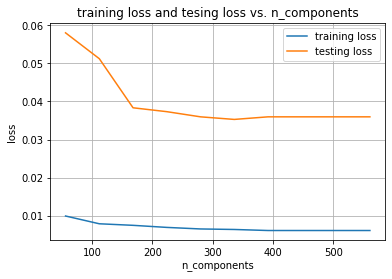

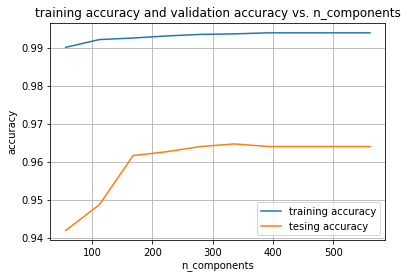

In [53]:
if __name__ == '__main__':

    # load data and preprocess from filename
    training_csv = '/content/drive/My Drive/cpe7993/humanActivityRecognition/activity_train.csv'
    testing_csv = '/content/drive/My Drive/cpe7993/humanActivityRecognition/activity_test.csv'
    x_train, y_train = load_data(training_csv, train_mode = True)

    nfolds = 4
    n_components_list = [int(0.1*(i+1)*x_train.shape[1]) for i in range(10)]

    predictions = get_predictions(training_csv, testing_csv, 
                                  n_components_list, show = True)

